In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
import numpy as np

## Import the Source File

In [2]:
#read-in the diabetes dataset
df_dia = pd.read_csv('./diabetes.csv')

In [3]:
#"tidy" the dataset
df_dia.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
df_dia.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

## Check for Null Values

In [5]:
for index, row in df_dia.iterrows():
    for col in df_dia.columns:
        if(pd.isnull(row[col])):
            print('true')


## Display Correlation Matrix

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

<AxesSubplot:>

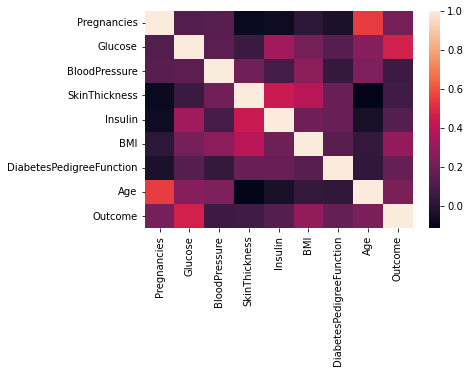

In [6]:
corr = df_dia.corr()
print(corr)
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

## The Distribution of DiabetesPedigreeFunction(Family/Inherited Risks)

In [7]:
# the range of all the possible values of DiabetesPedigreeFunction 

df_Pedi = df_dia[['DiabetesPedigreeFunction', 'Outcome']]

df_Pedi = df_Pedi.groupby(['DiabetesPedigreeFunction']).count().reset_index()

df_Pedi.head()

DiabetesPedigreeFunction  Outcome
0                     0.078        1
1                     0.084        1
2                     0.085        2
3                     0.088        2
4                     0.089        1

In [8]:
Pedi_combined = []

for i in range(len(df_Pedi['Outcome'])):
    for l in range(df_Pedi.loc[i,'Outcome']):
        Pedi_combined.append(df_Pedi.loc[i,'DiabetesPedigreeFunction'])

df_Pedi_pre = pd.DataFrame({"Pedi": Pedi_combined})

print(sum(Pedi_combined)/len(Pedi_combined))
print(len(Pedi_combined))
print("median is", df_Pedi_pre.Pedi.median())
df_Pedi_pre.head()

0.47187630208333314
768
median is 0.3725


Pedi
0  0.078
1  0.084
2  0.085
3  0.085
4  0.088

## The Distribution of Glucose Level

In [9]:
#the range of all the possible Glucose level values and whether a Glucose level value correpond to a diabetes diagnosis
df_Glu = df_dia.loc[:, ['Glucose', 'Outcome']]

df_Glu.reset_index(inplace = True)

df_Glu.drop(['index'], axis = 1, inplace= True)

df_Glu = df_Glu.groupby(['Glucose']).count().reset_index()

Glu_combined = []

for i in range(len(df_Glu['Outcome'])):
    for l in range(df_Glu.loc[i,'Outcome']):
        Glu_combined.append(df_Glu.loc[i,'Glucose'])

print(sum(Glu_combined)/len(Glu_combined))
print(len(Glu_combined))


df_Glu.head()

120.89453125
768


Glucose  Outcome
0        0        5
1       44        1
2       56        1
3       57        2
4       61        1

## The Distribution of BMI Index Values

In [10]:
#the range of all the possible BMI index values
df_BMI = df_dia.loc[:, ['BMI', 'Outcome']]

df_BMI.reset_index(inplace = True)

df_BMI.drop(['index'], axis = 1, inplace= True)

df_BMI = df_BMI.groupby(['BMI']).count().reset_index()

BMI_combined = []

for i in range(len(df_BMI['Outcome'])):
    for l in range(df_BMI.loc[i,'Outcome']):
        BMI_combined.append(df_BMI.loc[i,'BMI'])

print(sum(BMI_combined)/len(BMI_combined))
print(len(BMI_combined))


df_BMI.head()


31.992578124999977
768


BMI  Outcome
0   0.0       11
1  18.2        3
2  18.4        1
3  19.1        1
4  19.3        1

## Build the Bin for High BMI(Type III Obesity)  and Low Pedi

In [11]:
# get the datframe summarizing diabetes patients with different GLucose values who experience Obese III and
# has low family hisotry related risks of acquring diabetes

df_Glu_HighObeseLowPedi = df_dia[(df_dia.BMI > 40) & 
                                  (df_dia.DiabetesPedigreeFunction < 0.4)].loc[:, ['Glucose', 'Outcome']]

df_Glu_HighObeseLowPedi.reset_index(inplace = True)

df_Glu_HighObeseLowPedi = df_Glu_HighObeseLowPedi.drop('index', axis = 1)

df_Glu_HighObeseLowPedi.describe()

Glucose    Outcome
count   38.000000  38.000000
mean   128.605263   0.578947
std     35.826564   0.500355
min      0.000000   0.000000
25%    105.000000   0.000000
50%    135.000000   1.000000
75%    151.750000   1.000000
max    188.000000   1.000000

In [12]:
df_Glu_HighObeseLowPedi = df_Glu_HighObeseLowPedi.groupby(['Glucose']).count().reset_index()
df_Glu_HighObeseLowPedi.head()

Glucose  Outcome
0        0        1
1       67        1
2       81        1
3       92        1
4       94        1

In [13]:
Glu_combined = []

for i in range(len(df_Glu_HighObeseLowPedi['Outcome'])):
    for l in range(df_Glu_HighObeseLowPedi.loc[i,'Outcome']):
        Glu_combined.append(df_Glu_HighObeseLowPedi.loc[i,'Glucose'])

df_Glu_HighObeseLowPedi_pre = pd.DataFrame({"Glucose": Glu_combined})

print(sum(Glu_combined)/len(Glu_combined))
print(len(Glu_combined))
df_Glu_HighObeseLowPedi_pre.head()

128.60526315789474
38


Glucose
0        0
1       67
2       81
3       92
4       94

<AxesSubplot:xlabel='Glucose', ylabel='Count'>

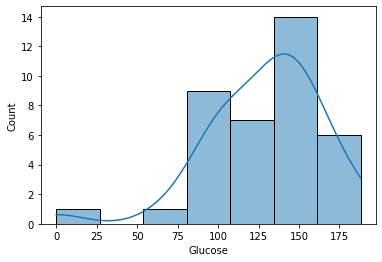

In [14]:
sns.histplot(x='Glucose',data = df_Glu_HighObeseLowPedi_pre, kde=True)

## Build the Bin for High BMI(Type III Obesity) and High Pedi

In [15]:
# get the datframe summarizing diabetes patients with different GLucose values who experience Obese III and
# has High family hisotry related risks of acquring covid

df_Glu_HighObeseHighPedi = df_dia[(df_dia.BMI > 40) & 
                                  (df_dia.DiabetesPedigreeFunction > 0.4)].loc[:, ['Glucose', 'Outcome']]

df_Glu_HighObeseHighPedi.reset_index(inplace = True)

df_Glu_HighObeseHighPedi = df_Glu_HighObeseHighPedi.drop('index', axis = 1)

df_Glu_HighObeseHighPedi.describe()

Glucose    Outcome
count   58.000000  58.000000
mean   136.655172   0.551724
std     31.457881   0.501661
min     79.000000   0.000000
25%    118.000000   0.000000
50%    136.000000   1.000000
75%    162.750000   1.000000
max    199.000000   1.000000

In [16]:
df_Glu_HighObeseHighPedi = df_Glu_HighObeseHighPedi.groupby(['Glucose']).count().reset_index()
df_Glu_HighObeseHighPedi.head()

Glucose  Outcome
0       79        1
1       81        1
2       86        1
3       88        1
4       90        1

In [17]:
Glu_combined = []

for i in range(len(df_Glu_HighObeseHighPedi['Outcome'])):
    for l in range(df_Glu_HighObeseHighPedi.loc[i,'Outcome']):
        Glu_combined.append(df_Glu_HighObeseHighPedi.loc[i,'Glucose'])

df_Glu_HighObeseHighPedi_pre = pd.DataFrame({"Glucose": Glu_combined})

print(sum(Glu_combined)/len(Glu_combined))
print(len(Glu_combined))
df_Glu_HighObeseHighPedi_pre.head()

136.6551724137931
58


Glucose
0       79
1       81
2       86
3       88
4       90

<AxesSubplot:xlabel='Glucose', ylabel='Count'>

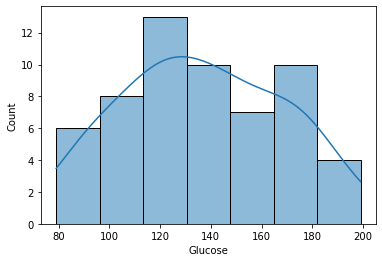

In [18]:
sns.histplot(x='Glucose',data = df_Glu_HighObeseHighPedi_pre, kde=True)

## Build the Bin for Overweight and Low Pedi

In [19]:
# get the datframe summarizing diabetes patients with different GLucose values who experience Overweight and
# have low risk of acquiring diabetes due family history risks

df_Glu_mediumObeseLowPedi = df_dia[(df_dia.BMI >25) & (df_dia.BMI <30)
                                         & (df_dia.DiabetesPedigreeFunction < 0.4)].loc[:, ['Glucose', 'Outcome']]

df_Glu_mediumObeseLowPedi.reset_index(inplace = True)

df_Glu_mediumObeseLowPedi = df_Glu_mediumObeseLowPedi.drop('index', axis = 1)

df_Glu_mediumObeseLowPedi.describe()

Glucose    Outcome
count   96.00000  96.000000
mean   116.65625   0.239583
std     28.95871   0.429070
min      0.00000   0.000000
25%     99.00000   0.000000
50%    114.50000   0.000000
75%    134.50000   0.000000
max    195.00000   1.000000

In [20]:
df_Glu_mediumObeseLowPedi = df_Glu_mediumObeseLowPedi.groupby(['Glucose']).count().reset_index()
df_Glu_mediumObeseLowPedi.head()

Glucose  Outcome
0        0        1
1       73        1
2       74        2
3       75        1
4       80        1

In [21]:
Glu_combined = []

for i in range(len(df_Glu_mediumObeseLowPedi['Outcome'])):
    for l in range(df_Glu_mediumObeseLowPedi.loc[i,'Outcome']):
        Glu_combined.append(df_Glu_mediumObeseLowPedi.loc[i,'Glucose'])

df_Glu_mediumObeseLowPedi_pre = pd.DataFrame({"Glucose": Glu_combined})

print(sum(Glu_combined)/len(Glu_combined))
print(len(Glu_combined))

df_Glu_mediumObeseLowPedi_pre.head()

116.65625
96


Glucose
0        0
1       73
2       74
3       74
4       75

<AxesSubplot:xlabel='Glucose', ylabel='Count'>

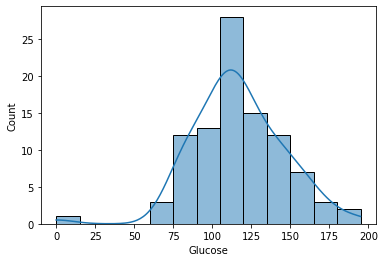

In [22]:
sns.histplot(x='Glucose', data = df_Glu_mediumObeseLowPedi_pre, kde=True)

## Build the Bin for Overweight and High Pedi

In [23]:
# get the datframe summarizing diabetes patients with different GLucose values who experience Overweight and
# have high risk of acquiring diabetes due family history risks

df_Glu_mediumObeseHighPedi = df_dia[(df_dia.BMI >25) & (df_dia.BMI <30)
                                         & (df_dia.DiabetesPedigreeFunction > 0.4)].loc[:, ['Glucose', 'Outcome']]

df_Glu_mediumObeseHighPedi.reset_index(inplace = True)

df_Glu_mediumObeseHighPedi = df_Glu_mediumObeseHighPedi.drop('index', axis = 1)

df_Glu_mediumObeseHighPedi.describe()

Glucose    Outcome
count   76.000000  76.000000
mean   117.986842   0.223684
std     27.543659   0.419482
min     71.000000   0.000000
25%     96.500000   0.000000
50%    112.500000   0.000000
75%    134.000000   0.000000
max    197.000000   1.000000

In [24]:
df_Glu_mediumObeseHighPedi = df_Glu_mediumObeseHighPedi.groupby(['Glucose']).count().reset_index()
df_Glu_mediumObeseHighPedi.head()

Glucose  Outcome
0       71        1
1       79        1
2       82        1
3       83        1
4       85        1

In [25]:
Glu_combined = []

for i in range(len(df_Glu_mediumObeseHighPedi['Outcome'])):
    for l in range(df_Glu_mediumObeseHighPedi.loc[i,'Outcome']):
        Glu_combined.append(df_Glu_mediumObeseHighPedi.loc[i,'Glucose'])

df_Glu_mediumObeseHighPedi_pre = pd.DataFrame({"Glucose": Glu_combined})

print(sum(Glu_combined)/len(Glu_combined))
print(len(Glu_combined))

df_Glu_mediumObeseHighPedi_pre.head()

117.98684210526316
76


Glucose
0       71
1       79
2       82
3       83
4       85

<AxesSubplot:xlabel='Glucose', ylabel='Count'>

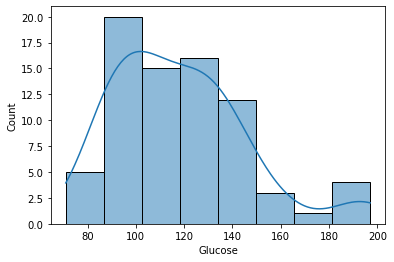

In [26]:
sns.histplot(x='Glucose', data = df_Glu_mediumObeseHighPedi_pre, kde=True)

## Build the Bin for Healthy/Underweight and Low Pedi

In [27]:
# get the datframe summarizing diabetes patients with different GLucose values who is healthy and 
# has low family history risk of getting diabetes

df_Glu_lowObeseLowPedi = df_dia[(df_dia.BMI < 25) & 
                                 (df_dia.DiabetesPedigreeFunction < 0.4)].loc[:, ['Glucose', 'Outcome']]

df_Glu_lowObeseLowPedi.reset_index(inplace = True)

df_Glu_lowObeseLowPedi = df_Glu_lowObeseLowPedi.drop('index', axis = 1)

df_Glu_lowObeseLowPedi.describe()

Glucose    Outcome
count   72.000000  72.000000
mean   106.388889   0.083333
std     28.816347   0.278325
min      0.000000   0.000000
25%     90.750000   0.000000
50%    101.000000   0.000000
75%    125.000000   0.000000
max    194.000000   1.000000

In [28]:
df_Glu_lowObeseLowPedi = df_Glu_lowObeseLowPedi.groupby(['Glucose']).count().reset_index()
df_Glu_lowObeseLowPedi.head()

Glucose  Outcome
0        0        1
1       56        1
2       68        1
3       71        1
4       73        2

In [29]:
Glu_combined = []

for i in range(len(df_Glu_lowObeseLowPedi['Outcome'])):
    for l in range(df_Glu_lowObeseLowPedi.loc[i,'Outcome']):
        Glu_combined.append(df_Glu_lowObeseLowPedi.loc[i,'Glucose'])

df_Glu_lowObeseLowPedi_pre = pd.DataFrame({"Glucose": Glu_combined})

print(sum(Glu_combined)/len(Glu_combined))
print(len(Glu_combined))

df_Glu_lowObeseLowPedi_pre.head()

106.38888888888889
72


Glucose
0        0
1       56
2       68
3       71
4       73

<AxesSubplot:xlabel='Glucose', ylabel='Count'>

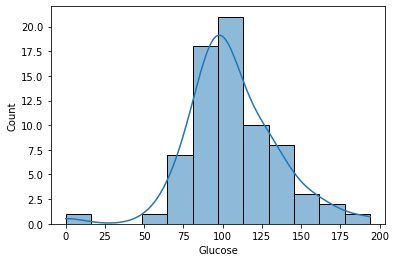

In [30]:
sns.histplot(x='Glucose', data = df_Glu_lowObeseLowPedi_pre, kde=True)

## Build the Bin for Healthy/Underweight and High Pedi

In [31]:
# get the datframe summarizing diabetes patients with different GLucose values who is healthy and 
# has high family history risk of getting diabetes

df_Glu_lowObeseHighPedi = df_dia[(df_dia.BMI < 25) & 
                                 (df_dia.DiabetesPedigreeFunction > 0.4)].loc[:, ['Glucose', 'Outcome']]

df_Glu_lowObeseHighPedi.reset_index(inplace = True)

df_Glu_lowObeseHighPedi = df_Glu_lowObeseHighPedi.drop('index', axis = 1)

df_Glu_lowObeseHighPedi.describe()

Glucose    Outcome
count   45.000000  45.000000
mean   108.488889   0.066667
std     21.956178   0.252262
min     57.000000   0.000000
25%     96.000000   0.000000
50%    107.000000   0.000000
75%    116.000000   0.000000
max    183.000000   1.000000

In [32]:
df_Glu_lowObeseHighPedi = df_Glu_lowObeseHighPedi.groupby(['Glucose']).count().reset_index()
df_Glu_lowObeseHighPedi.head()

Glucose  Outcome
0       57        1
1       71        1
2       82        1
3       83        1
4       87        1

In [33]:
Glu_combined = []

for i in range(len(df_Glu_lowObeseHighPedi['Outcome'])):
    for l in range(df_Glu_lowObeseHighPedi.loc[i,'Outcome']):
        Glu_combined.append(df_Glu_lowObeseHighPedi.loc[i,'Glucose'])

df_Glu_lowObeseHighPedi_pre = pd.DataFrame({"Glucose": Glu_combined})

print(sum(Glu_combined)/len(Glu_combined))
print(len(Glu_combined))

df_Glu_lowObeseHighPedi_pre.head()

108.4888888888889
45


Glucose
0       57
1       71
2       82
3       83
4       87

<AxesSubplot:xlabel='Glucose', ylabel='Count'>

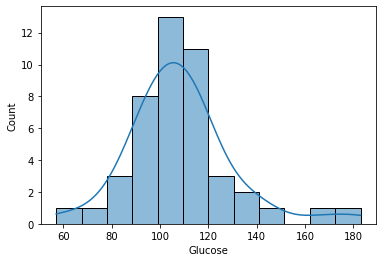

In [34]:
sns.histplot(x='Glucose', data = df_Glu_lowObeseHighPedi_pre, kde=True)

## Combine the 6 Bins to Create A Visualization Dataframe

In [35]:
df_violin = pd.DataFrame({ "Obesity_Level": ['Healthy']*(len(df_Glu_lowObeseHighPedi_pre['Glucose']) +
                                                        len(df_Glu_lowObeseLowPedi_pre['Glucose'])) +
                                            ['Overweight']*(len(df_Glu_mediumObeseHighPedi_pre['Glucose']) +
                                                        len(df_Glu_mediumObeseLowPedi_pre['Glucose'])) +
                                            ['Obese_III']*(len(df_Glu_HighObeseHighPedi_pre['Glucose']) +
                                                          len(df_Glu_HighObeseLowPedi_pre['Glucose']))
                          ,
                          "Family_History_Risk_Level": ['Low']*len(df_Glu_lowObeseLowPedi_pre['Glucose']) +
                                                       ['High']*len(df_Glu_lowObeseHighPedi_pre['Glucose']) + 
                                                       ['Low']*len(df_Glu_mediumObeseLowPedi_pre['Glucose']) +
                                                       ['High']*len(df_Glu_mediumObeseHighPedi_pre['Glucose']) +
                                                       ['Low']*len(df_Glu_HighObeseLowPedi_pre['Glucose']) +
                                                       ['High']*len(df_Glu_HighObeseHighPedi_pre['Glucose'])
                                                       ,
                          "Glucose_Level":df_Glu_lowObeseLowPedi_pre['Glucose'].values.tolist() +
                                          df_Glu_lowObeseHighPedi_pre['Glucose'].values.tolist() + 
                                          df_Glu_mediumObeseLowPedi_pre['Glucose'].values.tolist() + 
                                          df_Glu_mediumObeseHighPedi_pre['Glucose'].values.tolist() +
                                          df_Glu_HighObeseLowPedi_pre['Glucose'].values.tolist() +
                                          df_Glu_HighObeseHighPedi_pre['Glucose'].values.tolist()                                          
                          })

In [56]:
df_violin[df_violin.Obesity_Level == 'Healthy'].describe()

Glucose_Level
count     117.000000
mean      107.196581
std        26.308921
min         0.000000
25%        94.000000
50%       103.000000
75%       119.000000
max       194.000000

## Combine the 6 Bins to Create a Dataframe for Quantitative Anlaysis

In [37]:
df_calc = pd.DataFrame({ "Obesity_Level": [0]*(len(df_Glu_lowObeseHighPedi_pre['Glucose']) +
                                                        len(df_Glu_lowObeseLowPedi_pre['Glucose'])) +
                                            [1]*(len(df_Glu_mediumObeseHighPedi_pre['Glucose']) +
                                                        len(df_Glu_mediumObeseLowPedi_pre['Glucose'])) +
                                            [2]*(len(df_Glu_HighObeseHighPedi_pre['Glucose']) +
                                                          len(df_Glu_HighObeseLowPedi_pre['Glucose']))
                          ,
                          "Family_History_Risk_Level": [0]*len(df_Glu_lowObeseLowPedi_pre['Glucose']) +
                                                       [1]*len(df_Glu_lowObeseHighPedi_pre['Glucose']) + 
                                                       [0]*len(df_Glu_mediumObeseLowPedi_pre['Glucose']) +
                                                       [1]*len(df_Glu_mediumObeseHighPedi_pre['Glucose']) +
                                                       [0]*len(df_Glu_HighObeseLowPedi_pre['Glucose']) +
                                                       [1]*len(df_Glu_HighObeseHighPedi_pre['Glucose'])
                                                       ,
                          "Glucose_Level":df_Glu_lowObeseLowPedi_pre['Glucose'].values.tolist() +
                                          df_Glu_lowObeseHighPedi_pre['Glucose'].values.tolist() + 
                                          df_Glu_mediumObeseLowPedi_pre['Glucose'].values.tolist() + 
                                          df_Glu_mediumObeseHighPedi_pre['Glucose'].values.tolist() +
                                          df_Glu_HighObeseLowPedi_pre['Glucose'].values.tolist() +
                                          df_Glu_HighObeseHighPedi_pre['Glucose'].values.tolist()                                          
                          })

## Welch's t Test

Text(0.5, 1.0, 'Independent Sample T-Test')

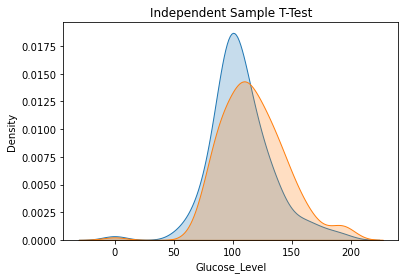

In [38]:
a = df_violin[(df_violin.Obesity_Level == 'Healthy')].Glucose_Level
b = df_violin[(df_violin.Obesity_Level == 'Overweight')].Glucose_Level

sns.kdeplot(a, shade=True)
sns.kdeplot(b, shade=True)
plt.title("Independent Sample T-Test")

In [39]:
from scipy import stats

tStat, pValue = stats.ttest_ind(a, b, equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

P-Value:0.0022062045156339065 T-Statistic:-3.0916916743437395


Text(0.5, 1.0, 'Independent Sample T-Test')

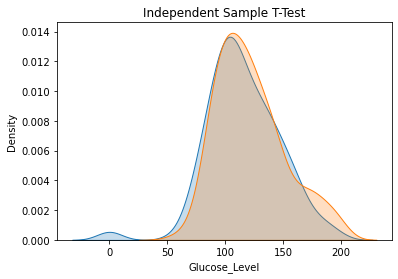

In [40]:
a = df_violin[(df_violin.Family_History_Risk_Level == 'Low')].Glucose_Level
b = df_violin[(df_violin.Family_History_Risk_Level == 'High')].Glucose_Level

sns.kdeplot(a, shade=True)
sns.kdeplot(b, shade=True)
plt.title("Independent Sample T-Test")

In [41]:
tStat, pValue = stats.ttest_ind(a, b, equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

P-Value:0.04043021448037519 T-Statistic:-2.0563640048840344


## Point and Confidence Interval Estimates

In [42]:
## Mean Difference between Healthy and Obese People

In [43]:
print("Glucose Point Estimate-Healthy Group: ", format(df_violin[(df_violin.Obesity_Level == 'Healthy')].Glucose_Level.mean(), '.2f'))
print("Glucose Point Estimate-Overweight Group: ", format(df_violin[(df_violin.Obesity_Level == 'Overweight')].Glucose_Level.mean(), '.2f'))

Glucose Point Estimate-Healthy Group:  107.20
Glucose Point Estimate-Overweight Group:  117.24


In [44]:
import scipy.stats as st

#define sample data
HealthyData = df_violin[(df_violin.Obesity_Level == 'Healthy')].Glucose_Level
OverweightData = df_violin[(df_violin.Obesity_Level == 'Overweight')].Glucose_Level

#create 95% confidence interval 
CLHealthy = st.t.interval(alpha=0.95, df=len(HealthyData)-1, loc=np.mean(HealthyData), scale=st.sem(HealthyData))
output = ["%.2f" % elem for elem in CLHealthy]

print("95% confidence Interval for the Healthy Group:",  output[0], '-', output[1])

CLOverweight = st.t.interval(alpha=0.95, df=len(OverweightData)-1, loc=np.mean(OverweightData), scale=st.sem(OverweightData))
output = ["%.2f" % elem for elem in CLOverweight]

print("95% confidence Interval for the Overweight Group:", output[0], '-', output[1])

95% confidence Interval for the Healthy Group: 102.38 - 112.01
95% confidence Interval for the Overweight Group: 112.99 - 121.50


In [45]:
## Mean Difference between High Pedigree(Family-Risk) and Low Pedigree(Family-Risk) People

In [46]:
print("Glucose Point Estimate-High Pedigree(Family-Risk) Group: ", format(df_violin[(df_violin.Family_History_Risk_Level == 'High')].Glucose_Level.mean(), '.2f'))
print("Glucose Point Estimate-Low Pedigree(Family-Risk) Group: ", format(df_violin[(df_violin.Family_History_Risk_Level == 'Low')].Glucose_Level.mean(), '.2f'))

Glucose Point Estimate-High Pedigree(Family-Risk) Group:  121.65
Glucose Point Estimate-Low Pedigree(Family-Risk) Group:  115.27


In [72]:
#define sample data
High = df_violin[(df_violin.Family_History_Risk_Level == 'High')].Glucose_Level
Low = df_violin[(df_violin.Family_History_Risk_Level == 'Low')].Glucose_Level

#create 95% confidence interval 
CLHigh = st.t.interval(alpha=0.95, df=len(High)-1, loc=np.mean(High), scale=st.sem(High))
output = ["%.2f" % elem for elem in CLHigh]

print("95% confidence Interval for the High Pedigree(Family-Risk) Group:",  output[0], '-', output[1])

CLLow = st.t.interval(alpha=0.95, df=len(Low)-1, loc=np.mean(Low), scale=st.sem(Low))
output = ["%.2f" % elem for elem in CLLow]

print("95% confidence Interval for the Low Pedigree(Family-Risk) Group:", output[0], '-', output[1])

95% confidence Interval for the High Pedigree(Family-Risk) Group: 117.28 - 126.02
95% confidence Interval for the Low Pedigree(Family-Risk) Group: 110.99 - 119.55


# Effect Size & Power Analysis

## Effect Size(Between-group Practical Significance) - Cohen's d

In [48]:
## Practical Difference between Healthy and Overweight People

In [49]:
from numpy import mean
from numpy import var
from math import sqrt

def cohend(d1, d2):
    n1, n2 = len(d1), len(d2)
    s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
    s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    u1, u2 = mean(d1), mean(d2)
    return abs((u1 - u2) / s)

In [50]:
print("Effect size between the healthy and overweight group: ", "{0:.2f}".format(cohend(HealthyData, OverweightData)))

Effect size between the healthy and overweight group:  0.37


In [51]:
## Practical Difference between High Pedigree(Family-Risk) and Low Pedigree(Family-Risk) People

In [52]:
print("Effect size between the high & low pedigree(family-risk) group: ","{0:.2f}".format(cohend(High, Low)))

Effect size between the high & low pedigree(family-risk) group:  0.21


In [54]:

import numpy as np
import pandas as pd

from statsmodels.stats.power import TTestIndPower
from scipy.stats import ttest_ind

import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
# required sample size
effect_size = 0.37
alpha = 0.05
power = 0.8

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, 
                                         power = power, 
                                         alpha = alpha)

print('Required sample size: {0:.2f}'.format(sample_size))
print("Type II Power: {0:.2f}".format(1-power))

Required sample size: 115.63
Type II Power: 0.20


In [67]:
# actual sample size

print("Sample Size of the Healthy Group:", len(HealthyData))
print("Sample Size of the Overweight Group:", len(OverweightData))

Sample Size of the Healthy Group: 117
Sample Size of the Overweight Group: 172


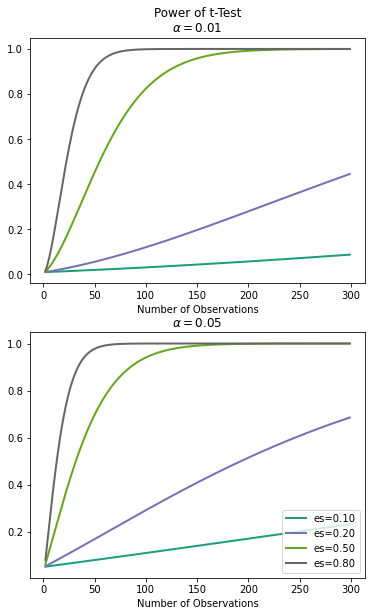

In [77]:
# power vs. number of observations 

fig = plt.figure()
ax = fig.add_subplot(2,1,1)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, 300),
                                 effect_size=np.array([0.1, 0.2, 0.5, 0.8]),
                                 alpha=0.01,
                                 ax=ax, title='Power of t-Test' + '\n' + r'$\alpha = 0.01$')
ax.get_legend().remove()
ax = fig.add_subplot(2,1,2)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, 300),
                                 effect_size=np.array([0.1, 0.2, 0.5, 0.8]),
                                 alpha=0.05,
                                 ax=ax, title=r'$\alpha = 0.05$') 
fig.subplots_adjust(top = 2)

## Visualization for ANOVA

<AxesSubplot:xlabel='Obesity_Level', ylabel='Glucose_Level'>

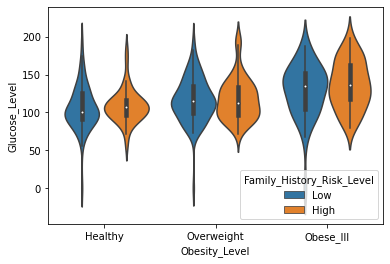

In [55]:
sns.violinplot(y='Glucose_Level', x="Obesity_Level", hue = "Family_History_Risk_Level",
              data=df_violin)

## Anderson-Darlington Test for Normal Distribution

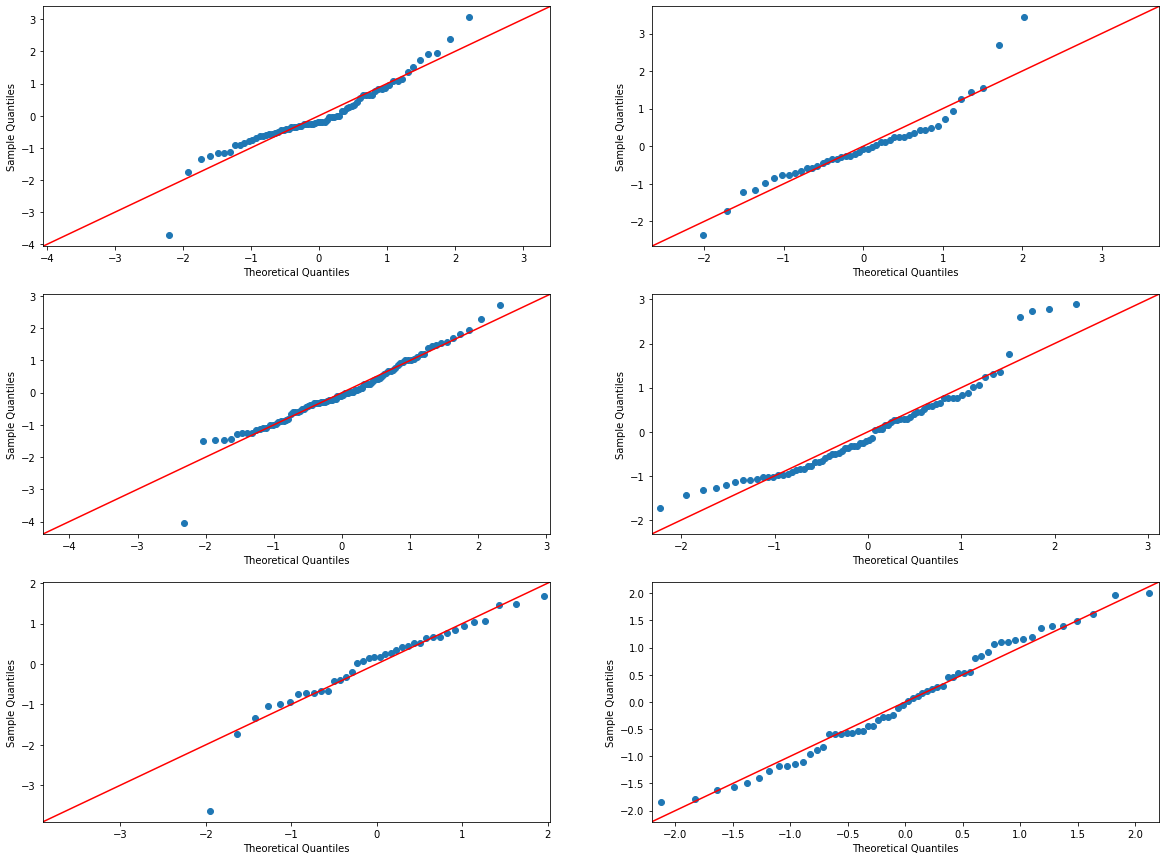

In [56]:
from matplotlib import pyplot as plt
import statsmodels.api as sm
import pylab

#visualize all distribution
rows, cols = 3, 2
fig, axes = plt.subplots(rows, cols, figsize=(20, 5*3))  
rounds = 6

data1 = df_violin[(df_violin.Obesity_Level == 'Healthy') & (df_violin.Family_History_Risk_Level == 'Low')].Glucose_Level
sm.qqplot(data1, line = "45", ax=axes[0][0], fit='True')
data2 = df_violin[(df_violin.Obesity_Level == 'Healthy') & (df_violin.Family_History_Risk_Level == 'High')].Glucose_Level
sm.qqplot(data2, line = "45", ax=axes[0][1], fit='True')
data3 = df_violin[(df_violin.Obesity_Level == 'Overweight') & (df_violin.Family_History_Risk_Level == 'Low')].Glucose_Level
sm.qqplot(data3, line = "45", ax=axes[1][0], fit='True')
data4 = df_violin[(df_violin.Obesity_Level == 'Overweight') & (df_violin.Family_History_Risk_Level == 'High')].Glucose_Level
sm.qqplot(data4, line = "45", ax=axes[1][1], fit='True')
data5 = df_violin[(df_violin.Obesity_Level == 'Obese_III') & (df_violin.Family_History_Risk_Level == 'Low')].Glucose_Level
sm.qqplot(data5, line = "45", ax=axes[2][0], fit='True')
data6 = df_violin[(df_violin.Obesity_Level == 'Obese_III') & (df_violin.Family_History_Risk_Level == 'High')].Glucose_Level
sm.qqplot(data6, line = "45", ax=axes[2][1], fit='True')

pylab.show()

In [57]:
from scipy.stats import anderson

result1 = anderson(data1,dist='norm')
#w, pvalue = stats.shapiro(model.resid)
#print(w,pvalue)
result2 = anderson(data2,dist='norm')
result3 = anderson(data3,dist='norm')
result4 = anderson(data4,dist='norm')
result5 = anderson(data5,dist='norm')
result6 = anderson(data6,dist='norm')

if result1[0] > result1[1][-3]:
    print(result1)
    print('The glucose level of healthy people with low family risk of diabetes is not normally distributed')
else:
    print(result1)
    print('The glucose level of healthy people with low family risk of diabetes is noramlly distributed')
if result2[0] > result2[1][-3]:
    print(result2)
    print('The glucose level of healthy people with high family risk of diabetes is not normally distributed')
else:
    print(result2)
    print('The glucose level of healthy people with high family risk of diabetes is noramlly distributed')
if result3[0] > result3[1][-3]:
    print(result3)
    print('The glucose level of overweight people with low family risk of diabetes is not normally distributed')
else:
    print(result3)
    print('The glucose level of overweight people with low family risk of diabetes is noramlly distributed')
if result4[0] > result4[1][-3]:
    print(result4)
    print('The glucose level of overweight people with high family risk of diabetes is not normally distributed')
else:
    print(result4)
    print('The glucose level of overweight people with high family risk of diabetes is noramlly distributed')
if result5[0] > result5[1][-3]:
    print(result5)
    print('The glucose level of type 3 obesity patient with low family risk of diabetes is not normally distributed')
else:
    print(result5)
    print('The glucose level of type 3 obesity patient with low family risk of diabetes is noramlly distributed')
if result6[0] > result6[1][-3]:
    print(result6)
    print('The glucose level of type 3 obesity patient with high family risk of diabetes is not normally distributed')
else:
    print(result6)
    print('The glucose level of type 3 obesity patient with high family risk of diabetes is noramlly distributed')

#null: your distribution is the same as theoretical distribution(normal distribution as the default)
#alternative: your distribution not the same as theoretical distribution

AndersonResult(statistic=1.2777689580439642, critical_values=array([0.548, 0.624, 0.749, 0.874, 1.039]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
The glucose level of healthy people with low family risk of diabetes is not normally distributed
AndersonResult(statistic=1.0885060241831397, critical_values=array([0.535, 0.609, 0.731, 0.853, 1.014]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
The glucose level of healthy people with high family risk of diabetes is not normally distributed
AndersonResult(statistic=0.5509891540800993, critical_values=array([0.554, 0.631, 0.757, 0.884, 1.051]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
The glucose level of overweight people with low family risk of diabetes is noramlly distributed
AndersonResult(statistic=1.1887004409379642, critical_values=array([0.549, 0.626, 0.751, 0.876, 1.042]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
The glucose level of overweight people with high family r

## Levene's Test for the Homogeneity of Variance:

In [58]:
from scipy.stats import levene

# Create three arrays for each sample:
ctrl = df_violin[(df_violin.Obesity_Level == 'Healthy') & (df_violin.Family_History_Risk_Level == 'Low')].Glucose_Level
trt1 = df_violin[(df_violin.Obesity_Level == 'Healthy') & (df_violin.Family_History_Risk_Level == 'High')].Glucose_Level
trt2 = df_violin[(df_violin.Obesity_Level == 'Overweight') & (df_violin.Family_History_Risk_Level == 'Low')].Glucose_Level
trt3 = df_violin[(df_violin.Obesity_Level == 'Overweight') & (df_violin.Family_History_Risk_Level == 'High')].Glucose_Level
trt4 = df_violin[(df_violin.Obesity_Level == 'Obese_III') & (df_violin.Family_History_Risk_Level == 'Low')].Glucose_Level
trt5 = df_violin[(df_violin.Obesity_Level == 'Obese_III') & (df_violin.Family_History_Risk_Level == 'High')].Glucose_Level

# Levene's Test in Python with Scipy:
stat, p = levene(ctrl, trt1, trt2, trt3, trt4, trt5)

print(stat, p)

#Null Hypothesis: the variances are equal across all samples/groups
#Alternative Hypothesis:  the variances are not equal across all samples/groups

2.2263442236709476 0.05109072911402468


## ANOVA result

In [59]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('Glucose_Level ~ (Obesity_Level) + \
            (Family_History_Risk_Level)+ \
            (Obesity_Level):(Family_History_Risk_Level)', data=df_calc).fit()

In [60]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Glucose_Level   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     14.79
Date:                Thu, 07 Apr 2022   Prob (F-statistic):           3.98e-09
Time:                        17:40:49   Log-Likelihood:                -1841.4
No. Observations:                 385   AIC:                             3691.
Df Residuals:                     381   BIC:                             3707.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                 106.1036      3.120     34.008      0.000      99.969     112.238
Obesity_Level                              10.9806      2.844      3.862      0.000       5.390      16.572
Family_History_Risk_Level                   0.1725      4.895      0.035      0.972      -9.453       9.798
Obesity_Level:Family_History_Risk_Level     3.3506      4.044      0.828      0.408      -4.601      11.302
==============================================================================
Omnibus:                       16.809   Durbin-Watson:                   0.454
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.161
Skew:                          -0.027   Prob(JB):                     7.00e-10
Kurtosis:                       4.620   Cond. No.                         7.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq     df          F  \
Obesity_Level                             32967.414756    1.0  39.058870   
Family_History_Risk_Level                  1061.665687    1.0   1.257832   
Obesity_Level:Family_History_Risk_Level     579.326033    1.0   0.686369   
Residual                                 321580.862725  381.0        NaN   

                                               PR(>F)  
Obesity_Level                            1.101984e-09  
Family_History_Risk_Level                2.627683e-01  
Obesity_Level:Family_History_Risk_Level  4.079208e-01  
Residual                                          NaN

In [62]:
# Ordinary Least Squares (OLS) model
model = ols("Glucose_Level ~ Obesity_Level + Family_History_Risk_Level", data=df_violin).fit()

In [63]:
anova_table = sm.stats.anova_lm(model)
anova_table

df         sum_sq       mean_sq          F  \
Obesity_Level                2.0   36703.361841  18351.680920  21.757845   
Family_History_Risk_Level    1.0     963.210495    963.210495   1.141987   
Residual                   381.0  321354.918574    843.451230        NaN   

                                 PR(>F)  
Obesity_Level              1.128364e-09  
Family_History_Risk_Level  2.859094e-01  
Residual                            NaN

In [64]:
model = ols("Glucose_Level ~ Obesity_Level", df_calc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Glucose_Level   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     42.42
Date:                Thu, 07 Apr 2022   Prob (F-statistic):           2.32e-10
Time:                        17:40:52   Log-Likelihood:                -1842.4
No. Observations:                 385   AIC:                             3689.
Df Residuals:                     383   BIC:                             3697.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       105.9461      2.398     44.172      0.000     101.230     110.662
Obesity_Level    12.9993      1.996      6.513      0.000       9.075      16.924
==============================================================================
Omnibus:                       18.814   Durbin-Watson:                   0.454
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.950
Skew:                          -0.043   Prob(JB):                     8.64e-12
Kurtosis:                       4.780   Cond. No.                         2.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

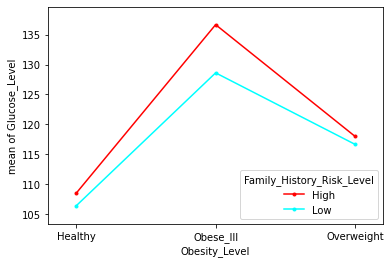

In [65]:
#interaction plot
fig = interaction_plot(x=df_violin['Obesity_Level'], 
                       trace=df_violin['Family_History_Risk_Level'], 
                       response=df_violin['Glucose_Level'])
plt.show()

## Post-hoc Test

In [66]:
#post hoc test for main effect Obesity Level
from bioinfokit.analys import stat
res = stat()
res.tukey_hsd(df=df_calc, res_var='Glucose_Level',
              xfac_var='Obesity_Level',
              anova_model='Glucose_Level~C(Obesity_Level)+\
              C(Family_History_Risk_Level)+\
              C(Obesity_Level):C(Family_History_Risk_Level)')
res.tukey_summary

group1  group2       Diff      Lower      Upper   q-value   p-value
0       0       1  10.047605   1.845796  18.249413  4.076629  0.011588
1       0       2  26.272169  16.847218  35.697120  9.276092  0.001000
2       1       2  16.224564   7.505188  24.943940  6.192070  0.001000

In [67]:
#post hoc test for main effect Family History Risk Level

res = stat()
res.tukey_hsd(df=df_violin, res_var='Glucose_Level',
              xfac_var='Family_History_Risk_Level',
              anova_model='Glucose_Level~C(Obesity_Level)+\
              C(Family_History_Risk_Level)+\
              C(Obesity_Level):C(Family_History_Risk_Level)')
res.tukey_summary

C:\Users\Chfen\anaconda3\lib\site-packages\bioinfokit\analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


group1 group2    Diff     Lower      Upper   q-value   p-value
0    Low   High  6.3762  0.532444  12.219956  3.034045  0.032556

In [68]:
#interaction effect between Obesity Level and Family_History_Risk_Level
res.tukey_hsd(df=df_violin, res_var='Glucose_Level', xfac_var=['Obesity_Level','Family_History_Risk_Level'], 
              anova_model='Glucose_Level~C(Obesity_Level)+\
              C(Family_History_Risk_Level)+\
              C(Obesity_Level):C(Family_History_Risk_Level)')
res.tukey_summary

C:\Users\Chfen\anaconda3\lib\site-packages\bioinfokit\analys.py:368: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[(ele1, ele2)] = df[(df[xfac_var[0]] == ele1) &


group1              group2       Diff      Lower      Upper  \
0       (Healthy, Low)     (Healthy, High)   2.100000 -13.731800  17.931800   
1       (Healthy, Low)   (Overweight, Low)  10.267361  -2.721248  23.255970   
2       (Healthy, Low)  (Overweight, High)  11.597953  -2.103533  25.299440   
3       (Healthy, Low)    (Obese_III, Low)  22.216374   5.511309  38.921439   
4       (Healthy, Low)   (Obese_III, High)  30.266284  15.566826  44.965741   
5      (Healthy, High)   (Overweight, Low)   8.167361  -6.884062  23.218784   
6      (Healthy, High)  (Overweight, High)   9.497953  -6.172787  25.168693   
7      (Healthy, High)    (Obese_III, Low)  20.116374   1.761523  38.471225   
8      (Healthy, High)   (Obese_III, High)  28.166284  11.615894  44.716673   
9    (Overweight, Low)  (Overweight, High)   1.330592 -11.461208  14.122393   
10   (Overweight, Low)    (Obese_III, Low)  11.949013  -4.018411  27.916437   
11   (Overweight, Low)   (Obese_III, High)  19.998922   6.143473  33.854372   
12  (Overweight, High)    (Obese_III, Low)  10.618421  -5.934083  27.170925   
13  (Overweight, High)   (Obese_III, High)  18.668330   4.142483  33.194178   
14    (Obese_III, Low)   (Obese_III, High)   8.049909  -9.337693  25.437511   

     q-value   p-value  
0   0.537315  0.900000  
1   3.202111  0.211463  
2   3.428893  0.150337  
3   5.387227  0.002236  
4   8.340614  0.001000  
5   2.198085  0.611718  
6   2.455165  0.507157  
7   4.439551  0.022356  
8   6.893846  0.001000  
9   0.421360  0.900000  
10  3.031359  0.267304  
11  5.846907  0.001000  
12  2.598582  0.444796  
13  5.206001  0.003596  
14  1.875390  0.742967

## DataFrame for ANCOVA Analysis

In [95]:
Pedi_cat = ['low' if i < 0.4 else 'high' for i in Pedi_combined]

In [97]:
df_ANCOVA = pd.DataFrame({"BMI": BMI_combined,
                      "Pedigree": Pedi_cat,
                      "Glucose": Glu_combined})
df_ANCOVA.head()

BMI Pedigree  Glucose
0  0.0      low        0
1  0.0      low        0
2  0.0      low        0
3  0.0      low        0
4  0.0      low        0

## ANCOVA Analysis

In [69]:
from pingouin import ancova

In [99]:
ancova(data=df_ANCOVA, dv='Glucose', covar='BMI', between='Pedigree')

Source             SS   DF            F         p-unc       np2
0  Pedigree    8636.458849    1   180.262451  4.667924e-37  0.190701
1       BMI  259491.397961    1  5416.173009  0.000000e+00  0.876237
2  Residual   36651.510045  765          NaN           NaN       NaN

## Build an Improved OLS Model with Interaction

In [100]:
df_OLS = pd.DataFrame({"BMI": BMI_combined,
                      "Pedigree": Pedi_combined,
                      "Glucose": Glu_combined})

In [101]:
from sklearn.preprocessing import PolynomialFeatures
import scipy.special
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [105]:
# get a regression analysis for the same anova table


X = df_OLS[["BMI",'Pedigree']]
y = df_OLS['Glucose']


Xb = sm.add_constant(X)
poly = PolynomialFeatures(interaction_only=True,include_bias = False)
X_tr = poly.fit_transform(Xb)
X = pd.concat([Xb,pd.DataFrame(X_tr,columns=poly.get_feature_names())],1)
mod = sm.OLS(y, X)
res = mod.fit()
res.summary()

C:\Users\Chfen\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Chfen\AppData\Local\Temp/ipykernel_60632/1740740003.py:11: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  X = pd.concat([Xb,pd.DataFrame(X_tr,columns=poly.get_feature_names())],1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Glucose   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                 1.599e+04
Date:                Thu, 07 Apr 2022   Prob (F-statistic):               0.00
Time:                        18:23:05   Log-Likelihood:                -2154.6
No. Observations:                 768   AIC:                             4317.
Df Residuals:                     764   BIC:                             4336.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.4796      0.468     18.122      0.000       7.561       9.398
BMI            0.7133      0.015     46.096      0.000       0.683       0.744
Pedigree      51.3575      1.225     41.913      0.000      48.952      53.763
x0             8.4796      0.468     18.122      0.000       7.561       9.398
x1             0.7133      0.015     46.096      0.000       0.683       0.744
x2            51.3575      1.225     41.913      0.000      48.952      53.763
x0 x1          0.7133      0.015     46.096      0.000       0.683       0.744
x0 x2         51.3575      1.225     41.913      0.000      48.952      53.763
x1 x2         -2.1362      0.060    -35.871      0.000      -2.253      -2.019
==============================================================================
Omnibus:                      304.976   Durbin-Watson:                   0.316
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33459.608
Skew:                          -0.761   Prob(JB):                         0.00
Kurtosis:                      35.300   Cond. No.                     1.59e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.13e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""